<a href="https://colab.research.google.com/github/Dekekona/StockMarketPredictor/blob/main/Stock_Market_Predictor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [83]:
%pip install jupyterlab

In [84]:
%pip install ipykernel

In [85]:
import yfinance as yf

In [86]:
# Initializes a ticker class to download price history for a symbol
# The symbol in this case is ^GSPC, which is the symbol for the S&P500

sp500 = yf.Ticker("^GSPC")

In [87]:
# This code query's all data from the very beginning of when the index was created
# The (period="max") is the max duration (i.e. the entire lifespan) of the S&P500

sp500 = sp500.history(period="max")

In [88]:
# This displays a panda's data frame
# Each row in the data frame represents a price on a single trading day. So none-trading days are not included in this data
# The columns represent price:
  # Open column represents the price when the market opened
  # High column represents the highest price during the day
  # Low column represents the lowest price during the day
  # Close columb represents the price when the market closed

sp500

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,0.0,0.0
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,0.0,0.0
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,0.0,0.0


In [89]:
# This shows the index of the S&P500 data frame
# We can see we have a date time index
# Reminder: The index is the "date" column

sp500.index

DatetimeIndex(['1927-12-30 00:00:00-05:00', '1928-01-03 00:00:00-05:00',
               '1928-01-04 00:00:00-05:00', '1928-01-05 00:00:00-05:00',
               '1928-01-06 00:00:00-05:00', '1928-01-09 00:00:00-05:00',
               '1928-01-10 00:00:00-05:00', '1928-01-11 00:00:00-05:00',
               '1928-01-12 00:00:00-05:00', '1928-01-13 00:00:00-05:00',
               ...
               '2024-08-30 00:00:00-04:00', '2024-09-03 00:00:00-04:00',
               '2024-09-04 00:00:00-04:00', '2024-09-05 00:00:00-04:00',
               '2024-09-06 00:00:00-04:00', '2024-09-09 00:00:00-04:00',
               '2024-09-10 00:00:00-04:00', '2024-09-11 00:00:00-04:00',
               '2024-09-12 00:00:00-04:00', '2024-09-13 00:00:00-04:00'],
              dtype='datetime64[ns, America/New_York]', name='Date', length=24292, freq=None)

<Axes: xlabel='Date'>

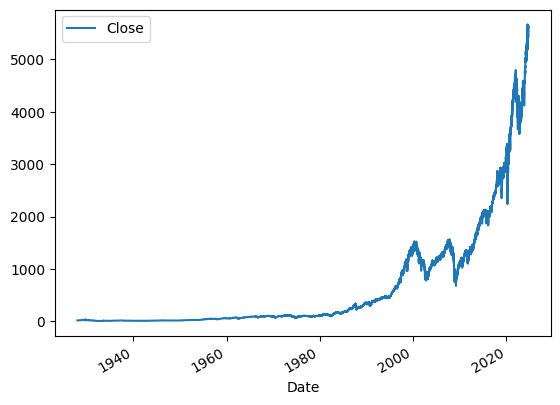

In [90]:
# This code plots the closing price against the index

sp500.plot.line(y = "Close", use_index = True)

In [91]:
# This code deletes the "Dividends" and "Stock Splits" column of our table

del sp500["Dividends"]
del sp500["Stock Splits"]

# The reason we delete them is because this data is more relevant for an individual stock, not an index

In [92]:
# We take the "Close" column and shift it down by 1 into the "Tomorrow" column

sp500["Tomorrow"] = sp500["Close"].shift(-1)

In [93]:
sp500

,Open,High,Low,Close,Volume,Tomorrow
Date,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000
...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,5554.129883
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5595.759766


In [94]:
# The target is what we're going to try to predict with Machine Learning
# What we do with the target is check if Tomorrow's price is greater than Today's price

# the .astype method turns our boolean into an int (bool -> int)
  # True -> 1
  # False -> 0

sp500["Target"] = (sp500["Tomorrow"] > sp500["Close"]).astype(int)

In [95]:
sp500

# Notice "1" in the Target column means True (as in Tomorrow's price > Today's price)
# Notice "0" in the Target column means False (as in Tomorrow's price < Today's price)

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.760000,1
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,17.719999,0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,17.549999,0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,17.660000,1
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,17.500000,0
...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020,1
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,5554.129883,1
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5595.759766,1


In [96]:
# If you go back too far into the S&P500, the market may have shifted fundamentally in ways that old data may not be as useful in making future predictions
  # For this reason, we will remove all data that comes before 1990

# The following code uses the panda's loc method to look at data after Jan 1st 1990

# .copy() helps to avoid Panda's SettingWithCopyWarning when you try to subset a data frame and later assign back to it

sp500 = sp500.loc["1990-01-01":].copy()

## Training an initial Machine Learning model:

In [97]:
from sklearn.ensemble import RandomForestClassifier

# RandomForestClassifier (which will be referred to as RFC from here on out) is a Machine Learning model
# Here are some traits of RFC:
  # Trait 1: RFC works by training a bunch of individual decision trees with randomized parameters, and then averaging the results from those decision trees
    # For this reason, RFC is more resistant to overfit than other models
  # Trait 2: RFC runs relatively quickly
  # Trait 3: RFC can pick up non-linear tendencies in the data
    # Example: "Open" price is not linearly correlated with the Target. If "Open" price is higher, that doesn't mean Target will be higher
    # This is needed because in Stock Price Prediction, most relations are non-linear. Otherwise, if you DID find a linear relation, you could make a lot of money!


# n_estimators = The number of decision trees we want to train
  # The higher this is, generally the better our accuracy will be (up to a limit)
# min_samples_split: This protects us against overfitting
  # Decision trees have a tendency to overfit if they build the trees too deeply
  # The higher this is, the less accurate the model will be, but the less it will overfit
# random_state: Setting a random_state means that if we run the same model twice, the random numbers that are generated will be in a predictable sequence each time, so we get the same results each time
  # This helps for whenever you try to improve your model, where you can know that your adjustments are what changed the results, not randomness

model = RandomForestClassifier(n_estimators=100, min_samples_split = 100, random_state = 1)

# Here's the train set
# This is time series data. Therefore, avoid cross validation, since if you do, your results will look amazing when you train, and terrible in the real world
  # The reason why is if you use cross validation or another way to split up your training & test set, it doesn't take the time series nature of the data into account, which means you would be using future data to predict the past, and that's just not how the world works
    # This results in something called "leakage" where you're leaking information into the model
# We are training everything EXCEPT the last 100 rows

train = sp500.iloc[:-100]

# Here's the test set
# We are training ONLY the last 100 rows
# Notice there is no overlap between the train set's rows & the test set's rows

test = sp500.iloc[-100:]

# The predictors list with all the columns we'll use to predict the Target

predictors = ["Close", "Volume", "Open", "High", "Low"]

# Here, we'll fit the model
# We're using the predictor columns to predict the Target

model.fit(train[predictors], train["Target"])

RandomForestClassifier(min_samples_split=100, random_state=1)

## Measuring how accurate the model is

In [98]:
from sklearn.metrics import precision_score

# The precision score essentially asks: "When we said that the market would go up (i.e. when Target=1), did it actually go up?"
# The precision score then calculates the percentage of times that the answer to the above question == True

preds = model.predict(test[predictors])

In [99]:
preds

# Notice these predictions are in a numpy areas
# Therefore, we'll turn it into a panda series in the next code block

array([0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [100]:
import pandas as pd

preds = pd.Series(preds, index=test.index)

# We use .index instead of .index() because .index() does not exist as a method for a pandas DataFrame
# We can use .index because it is not a method, but rather an attribute of pandas DataFrames
# These rules also apply to pandas Series

In [101]:
preds

,0
Date,
2024-04-23 00:00:00-04:00,0
2024-04-24 00:00:00-04:00,0
2024-04-25 00:00:00-04:00,1
2024-04-26 00:00:00-04:00,1
2024-04-29 00:00:00-04:00,1
...,...
2024-09-09 00:00:00-04:00,0
2024-09-10 00:00:00-04:00,0
2024-09-11 00:00:00-04:00,0


In [102]:
# This compares the actual target (which is test["Target"])) to the predicted target (preds)

precision_score(test["Target"], preds)

# If precision_score > 0.5, it means it's correct more than 50% of the time
  # In that case, we FOLLOW the model
# If precision_score < 0.5, it means it's correct more than 50% of the time
  # In that case, we GO AGAINST the model

0.8

In [103]:
# This is to plot our predictions

combined = pd.concat([test["Target"], preds], axis=1)

# The 'axis=1' means to treat each of our inputs as a column in our data set

<Axes: xlabel='Date'>

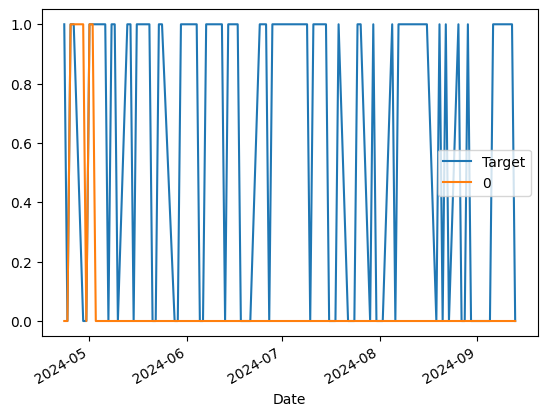

In [104]:
combined.plot()

<Axes: xlabel='Date'>

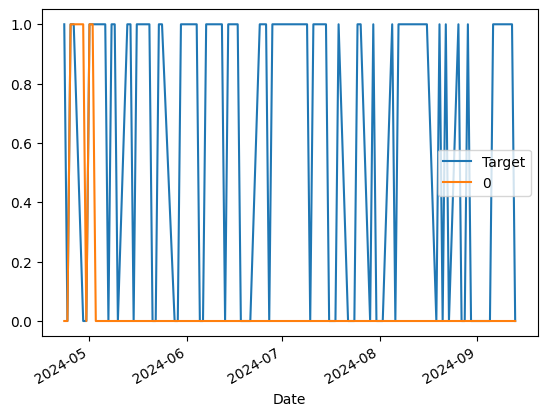

In [105]:
combined.plot()

## Building a Backtesting System

In [106]:
# Here, we will build a more robust way to test our algorithm
# For example, above, we're only testing against the last 100 rows. But if you want this program to be more useful, you want to test it across multiple years. So what we'll do is something called backtesting
# In order to enable backtesting, the first thing we'll do is create a prediction function

def predict(test, train, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict(test[predictors]) # Here, the model just returns 0 or 1
  preds = pd.Series(preds, index=test.index, name="Predictions") # Here, we give the series a name: "Predictions"
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [107]:
# Here's the video's backtest function
# This code produced a "ValueError: Found array with 0 sample(s) (shape=(0, 5)) while a minimum of 1 is required by RandomForestClassifier" error, so I wrotr another backtest function below

def backtest(data, model, predictors, start=2500, step=250):
                                          # START VALUE EXPLANATION: When you backtest, you want to have a certain amount of data to train your first model. So every trading year has about 250 days
                                            # This means we're training on 10 years of data
                                          # STEP VALUE EXPLANATION: This is the interval at which the backtesting process moves forward through the dataset.  For example, if step is set to 250, it means that after analyzing the data starting from the 2500th point, the process will then move forward by 250 data points for the next iteration.
                                            # "We will be training a model for about a year, and then going into the next year and then the next year"
                                            # We can take the data predicted from the 11th year and combine that with the 10 first years to get the 12th year, then collect the past 12 years to get the 13th year, collect the past 13 years to get the 14th year, etc...
  all_predictions = []                    # List of dataframes, where each dataframe is the predictions for a single year
  for i in range(0, data.shape[0], step): # Makes predictions for all years except the first 10
                                          # data.shape[0] EXPLANATION: When you call data.shape, it returns a tuple (number_of_rows, number_of_columns). The index 0 is to retrieve the number of rows, which is presumably how many trading days are in your dataset
    train = data.iloc[0:i].copy()         # Train set is for all years prior to the current year.
                                            # The fact that 0 in [0:i] remains the same but i changes means that the train set increases as we move from year to year
    test = data.iloc[i:(i+step)].copy()   # Test set is the current year.
                                            # The ([i:i+step]) ensures we're only looking at 1 year (i.e. the current year)
                                          # .copy() is to avoid the copy warning for both
    predictions = predict(train, test, predictors, model)
    all_predictions.append(predictions)
  return pd.concat(all_predictions)       # .concat() takes a list of data frames and combines them all into a single dataframe

In [108]:
# Here's my personal backtest function

def backtest(data, model, predictors, start=2500, step=250):
    all_predictions = []
    for i in range(start, data.shape[0], step):
        train = data.iloc[0:i].copy()
        test = data.iloc[i:(i+step)].copy()
        if not train.empty and not test.empty:
            predictions = predict(train, test, predictors, model)
            all_predictions.append(predictions)
        else:
            print(f"Skipping iteration {i} due to insufficient data.")
    return pd.concat(all_predictions)

In [109]:
predictions = backtest(sp500, model, predictors) # 21mins iykyk

In [110]:
# This was purely for debugging the video's faulty backtest function
# I noticed print(test.shape) == (100, 7), which I thought meant that the ValueError's "0 samples" reasoning was wrong, but I wasn't sure.

# print(test.shape)
# print("------------------------------")
# print(test.head())
# print("------------------------------")
# print(test["Target"].value_counts())
# print("------------------------------")
# print(model)
# print("------------------------------")
# print(len(model.feature_importances_))
# print("------------------------------")
# print(len(test.columns))
# print("------------------------------")

In [111]:
# This counts up how many of each type of prediction was made

predictions["Predictions"].value_counts()

# We predicted the market would go UP on 107073 days
# We predicted the market would go DOWN on 30427 days


,count
Predictions,
1,107073
0,30427


In [112]:
# This calculates the precision of our predictions

precision_score(predictions["Target"], predictions["Predictions"])

# So we were about 53% accurate

0.5346165700036424

In [113]:
# To see if our 53% rate of accuracy is actually good, we can use the following as a benchmark:
  # Percentage of days where market went up = The number of days where the market went up / Number of days

percentage = predictions["Target"].value_counts() / predictions.shape[0]

# If precision score < percentage, this means that we would've been better off buying at the beginning of the day & selling at the end of the day INSTEAD of listening to our AI Model

## Adding Additional Predictors to our Model

This is in hopes of increasing precision

In [114]:
# These are the horizons in which we'll look at rolling means (i.e moving averages)
# We'll calculate the mean close price in:
  # The last 2 days
  # The last trading week (5 days)
  # The last trading quarter (60 days)
  # The last trading year (250 days)
  # The last 4 trading years (1000 days)
# We'll find the ratio between today's closing price and the closing price in those periods which will help us know the following:
  # If the market's gone UP a ton, then it's likely due for a downturn
  # If the market's gone DOWN a ton, then it's likely due for an upswing

horizons = [2,5,60, 250, 1000]
new_predictors = []

for horizon in horizons:
  rolling_averages = sp500.rolling(horizon).mean()                            # Calculates moving average

  ratio_column = f"Close_Ratio_{horizon}"
  sp500[ratio_column] = sp500["Close"] / rolling_averages["Close"]            # The first time through the loop, it will be the ratio between today's close & the average close in the last 2 days
                                                                              # The second time through the loop, it will be the ratio between today's close & the average close in the last 5 days, and so on...
  trend_column = f"Trend_{horizon}"                                           # "Trend" is the number of days in the past X (i.e. # of horizon) days where the stock price went up
  sp500[trend_column] = sp500.shift(1).rolling(horizon).sum()["Target"]       # Here's what this will do: On any given day, it will look at the past few days and see the sum of the Target (i.e. the sum of the number of days where the stock went up)

  new_predictors += [ratio_column, trend_column]


In [115]:
sp500

# The "NaN" means there's not enough data to compute a result.
  # For example, Trend_5 has NaN because there isn't at least 5 days in the past from X date
# NaN appears for Jan 3rd's Trend_2 but not Close_Ratio_2 because Trend doesn't include the current day, but Close_Ratio days
  # It doesn't include the current day because if it did, you'd be including today's Target in that column, which would give you leakage.
    # This leakage would make your algorithm look amazing, but it won't be useful in the real world

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0,0.998706,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0,0.995675,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1,0.995098,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0,1.002252,1.0,0.993731,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020,1,1.005757,1.0,0.997207,1.0,0.995066,34.0,1.096431,143.0,1.260025,525.0
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,5554.129883,1,1.002231,2.0,1.002888,2.0,0.999330,34.0,1.100423,144.0,1.265038,526.0
2024-09-11 00:00:00-04:00,5496.419922,5560.410156,5406.959961,5554.129883,3839450000,5595.759766,1,1.005304,2.0,1.012325,3.0,1.009613,35.0,1.111192,144.0,1.277872,527.0


In [116]:
sp500 = sp500.dropna()

# Removes the rows that contain NaN values

In [117]:
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target,Close_Ratio_2,Trend_2,Close_Ratio_5,Trend_5,Close_Ratio_60,Trend_60,Close_Ratio_250,Trend_250,Close_Ratio_1000,Trend_1000
Date,,,,,,,,,,,,,,,,,
1993-12-14 00:00:00-05:00,465.730011,466.119995,462.459991,463.059998,275050000,461.839996,0,0.997157,1.0,0.996617,1.0,1.000283,32.0,1.028047,127.0,1.176082,512.0
1993-12-15 00:00:00-05:00,463.059998,463.690002,461.839996,461.839996,331770000,463.339996,1,0.998681,0.0,0.995899,1.0,0.997329,32.0,1.025151,126.0,1.172676,512.0
1993-12-16 00:00:00-05:00,461.859985,463.980011,461.859985,463.339996,284620000,466.380005,1,1.001621,1.0,0.999495,2.0,1.000311,32.0,1.028274,127.0,1.176163,513.0
1993-12-17 00:00:00-05:00,463.339996,466.380005,463.339996,466.380005,363750000,465.850006,0,1.003270,2.0,1.004991,3.0,1.006561,32.0,1.034781,128.0,1.183537,514.0
1993-12-20 00:00:00-05:00,466.380005,466.899994,465.529999,465.850006,255900000,465.299988,0,0.999431,1.0,1.003784,2.0,1.005120,32.0,1.033359,128.0,1.181856,513.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-09-06 00:00:00-04:00,5507.330078,5522.470215,5402.620117,5408.419922,3822800000,5471.049805,1,0.991295,0.0,0.979459,1.0,0.983825,34.0,1.084735,143.0,1.246199,524.0
2024-09-09 00:00:00-04:00,5442.069824,5484.200195,5434.490234,5471.049805,3825940000,5495.520020,1,1.005757,1.0,0.997207,1.0,0.995066,34.0,1.096431,143.0,1.260025,525.0
2024-09-10 00:00:00-04:00,5490.509766,5497.910156,5441.720215,5495.520020,3848180000,5554.129883,1,1.002231,2.0,1.002888,2.0,0.999330,34.0,1.100423,144.0,1.265038,526.0


## Improving our Model

In [118]:
# We will update our model by:
  # Increasing n_estimators
  # Reducing min_sample_split

model = RandomForestClassifier(n_estimators=200, min_samples_split=50, random_state=1)

# Here, we will alter our predict function slightly

def predict(test, train, predictors, model):
  model.fit(train[predictors], train["Target"])
  preds = model.predict_proba(test[predictors])[:,1]  # Unlike the last predict function, this one will return the probability that a row will be a 0 or 1, instead of having the function just return 0 or 1
                                                      # The [:,1] is to extract the 2nd column of this, which is the "Target" column (right beside the "Tomorrow" column) (?)
  preds[preds >= 0.5] = 1                             # This is to set our custom threshold.
  preds[preds <= 0.5] = 0
                                                        # By default, the threshold is 0.5, meaning if there's greater than a 50% that the price goes up, then the model will return "The price will go up"
                                                        # Here's a tradeoff:
                                                          # This custom threshold will reduce the total number of days where it predicts the price will go up (i.e. our total number of trading days)
                                                          # BUT, on the bright side, this will increase the chance that the price will actually go up on those days
  preds = pd.Series(preds, index=test.index, name="Predictions") # Here, we give the series a name: "Predictions"
  combined = pd.concat([test["Target"], preds], axis=1)
  return combined

In [119]:
predictions = backtest(sp500, model, new_predictors)

# You may have noticed that we stopped including the "Close", "Open", "High", "Low" & "Volume" columns.
  # Reason for that is they're absolute numbers, so they're not super informative to the model as far as telling whether the price will go up or down. It's only really the ratios that are informative

In [120]:
predictions["Predictions"].value_counts()

,count
Predictions,
1.0,58151
0.0,46849


In [121]:
precision_score(predictions["Target"], predictions["Predictions"])

0.537325239462778

## Ways to improve this model in the future

In [122]:
# 1. Look at world-wide overnight markets instead of just U.S day market hours to see if you can correlate them
# 2. You can add in news, by potentially implementing some NLP to analyze sentiment surrounding a company, and how it correlates with the stock over time
# 3. You can add in some key components of the S&P500, like key stocks & key sectors
  # For example, if tech is in a downturn, it's possible that 6 months later, the S&P500 goes down
# 4. You can also increase the resolution by using hourly data, minute-to-minute data or even tick data (although it may not be cheap to get)